# Ejercicio 1

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import median_absolute_error, mean_squared_error

from funciones_auxiliares_hito_2 import analizar_variables_indpendientes

plt.rcParams['figure.figsize'] = (20, 6)
sns.set_style()

In [4]:
df = pd.read_csv('winequality-red.csv')

# Ejercicio 2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Todas las columnas son del tipo numericas decimales (continuas), exceptuando quality que es numerica
entera (discreta).

- Ninguna columna posee valores faltantes!

In [6]:
vars_independientes = df.drop(columns='quality')

Analizando todas las variables numericas 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


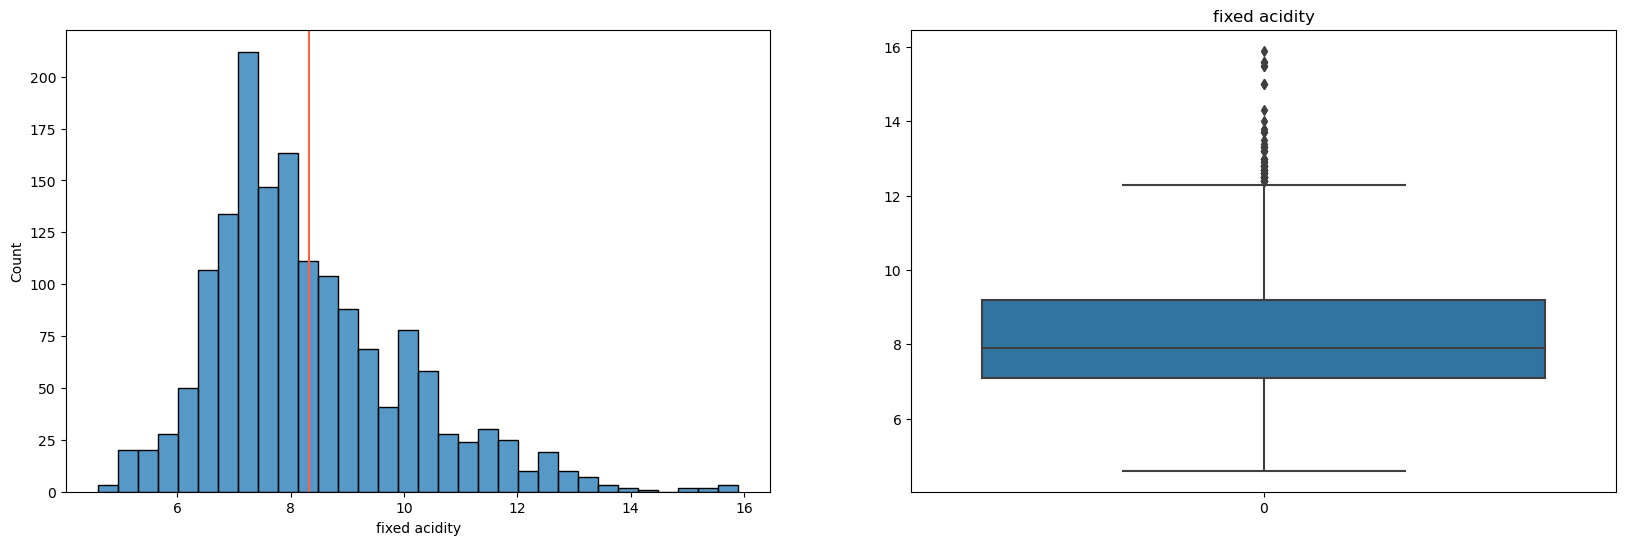

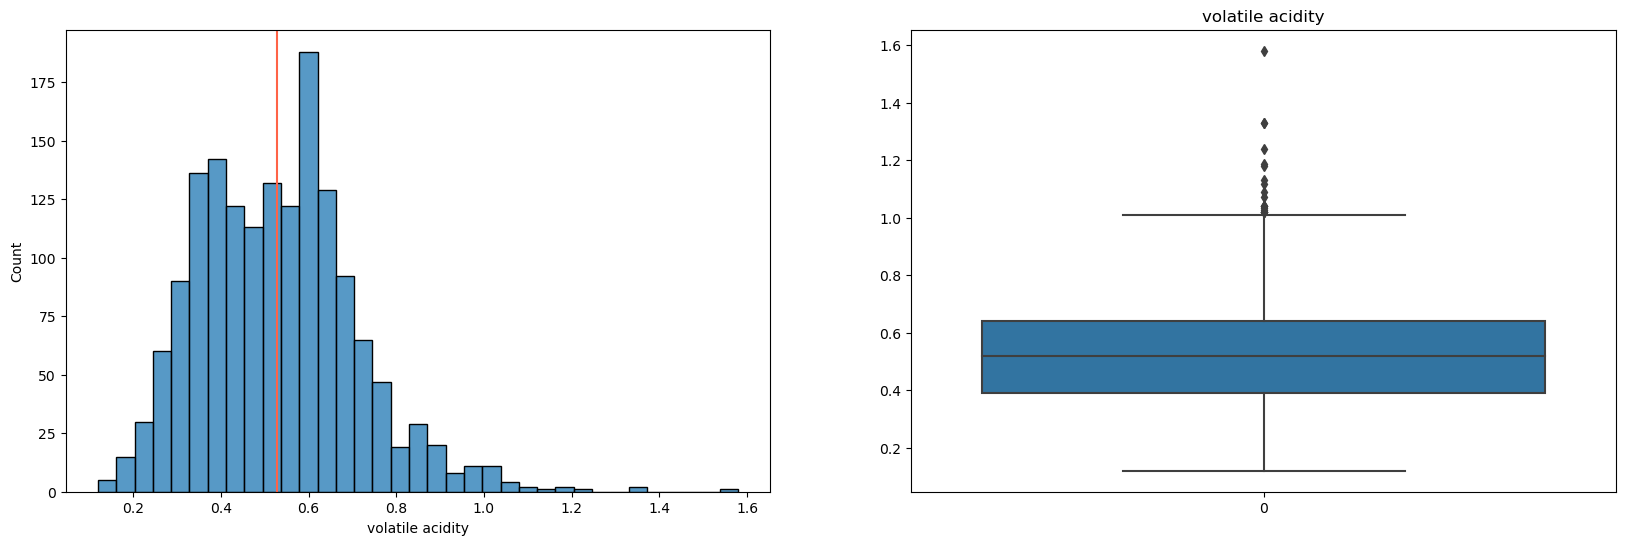

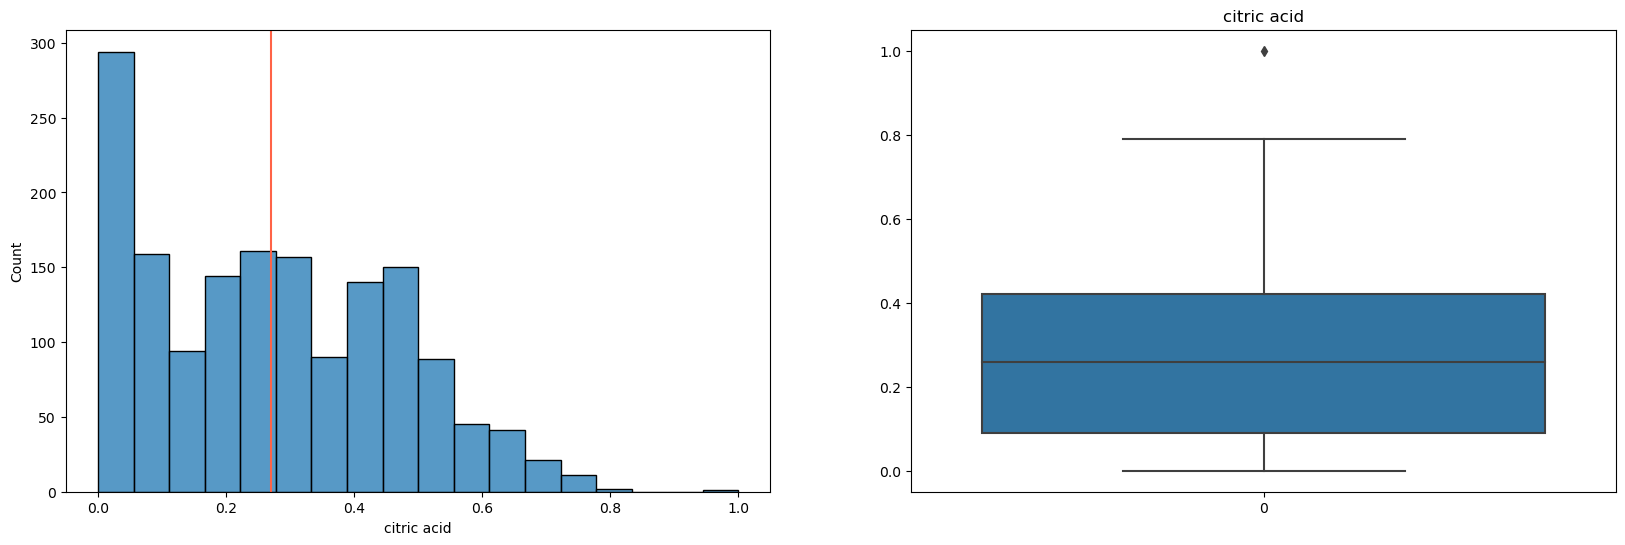

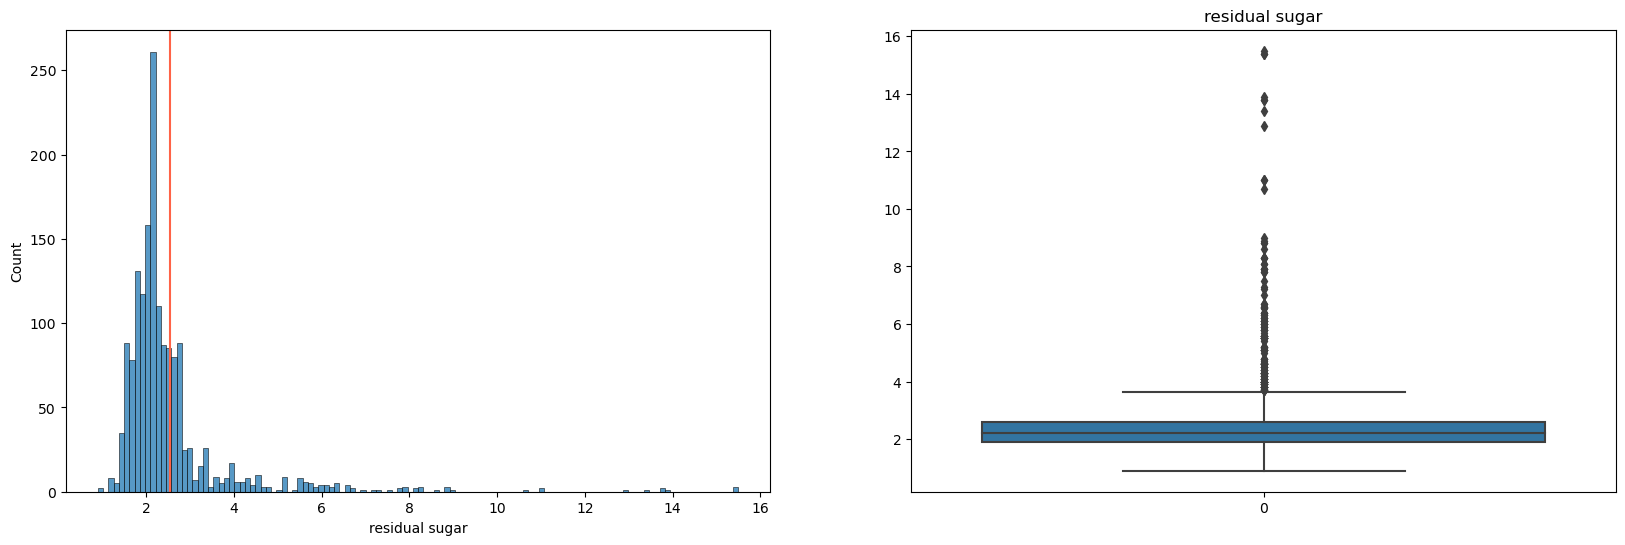

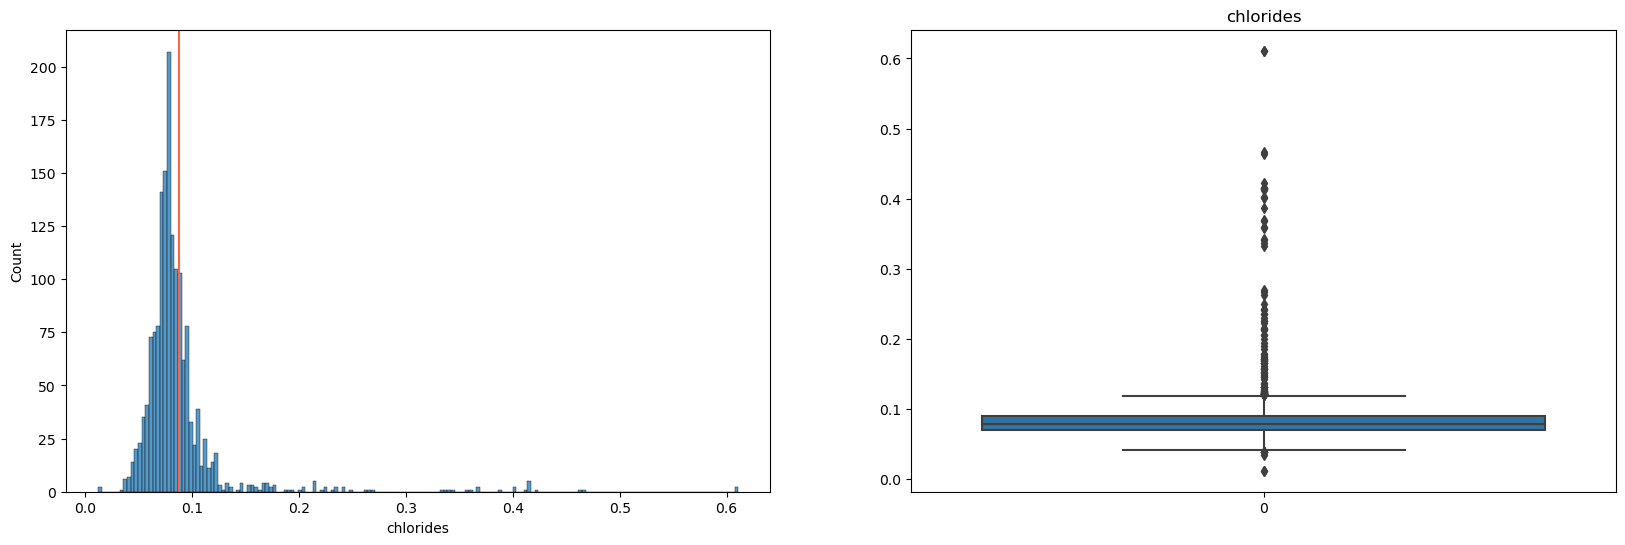

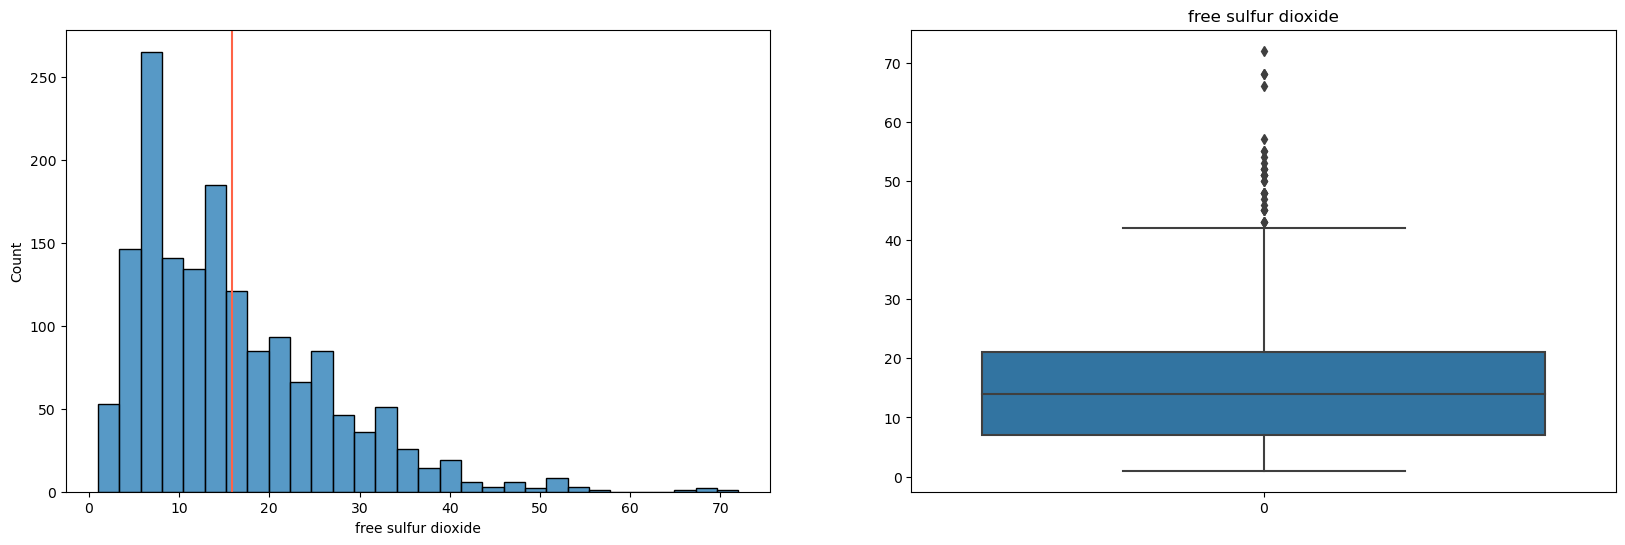

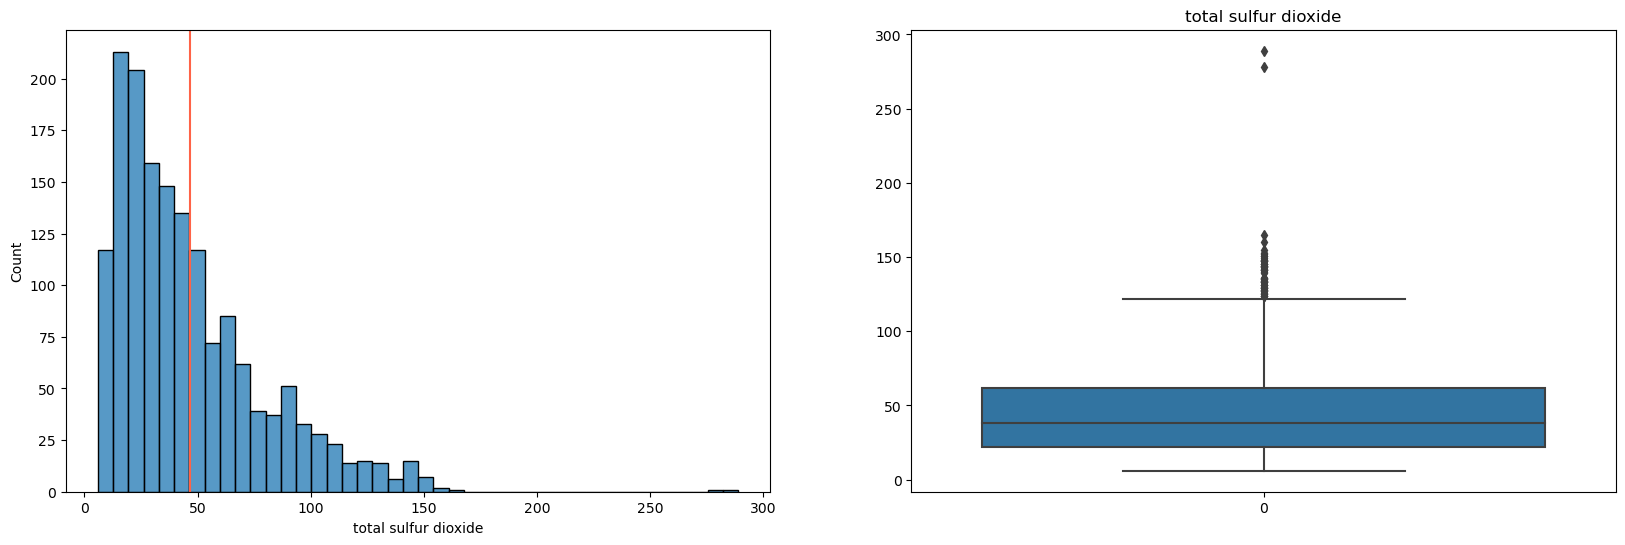

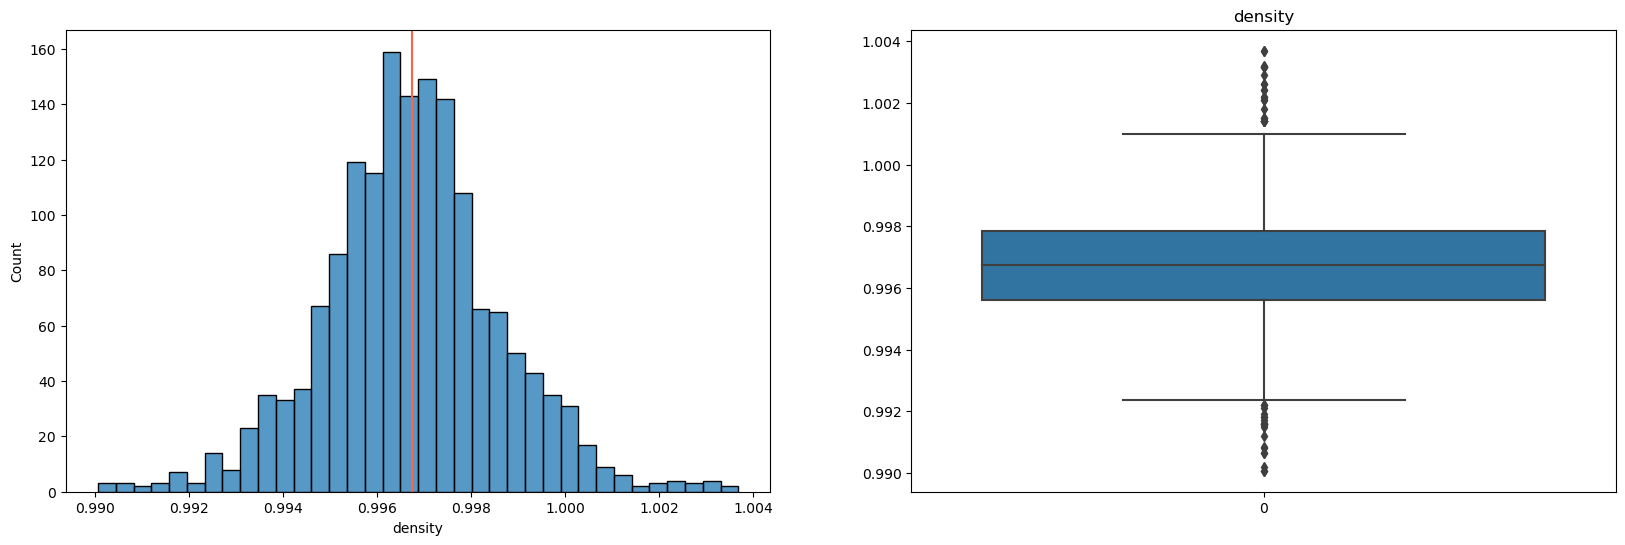

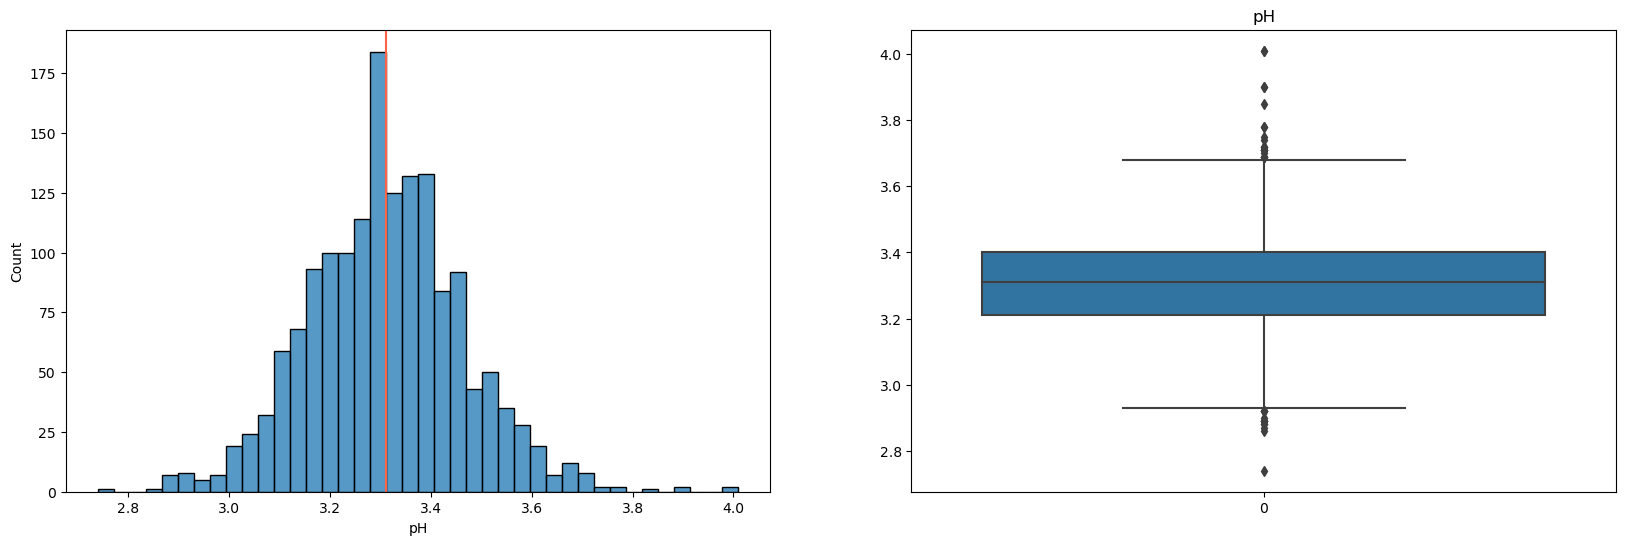

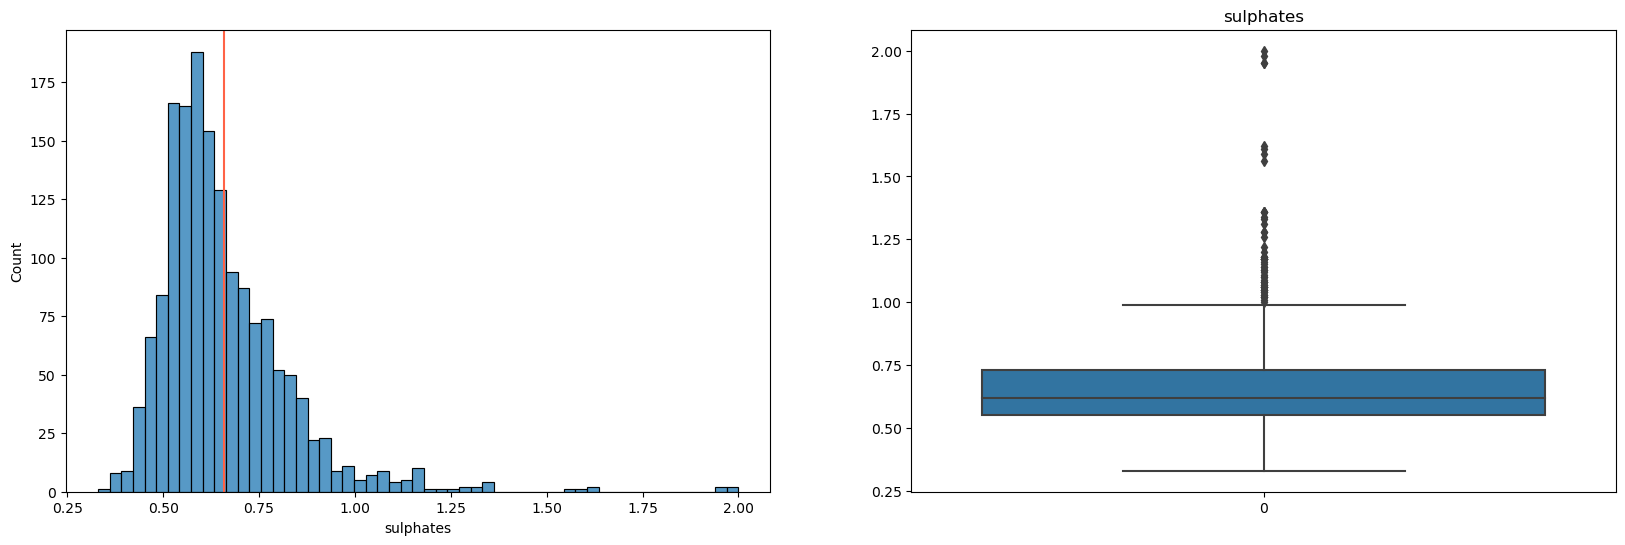

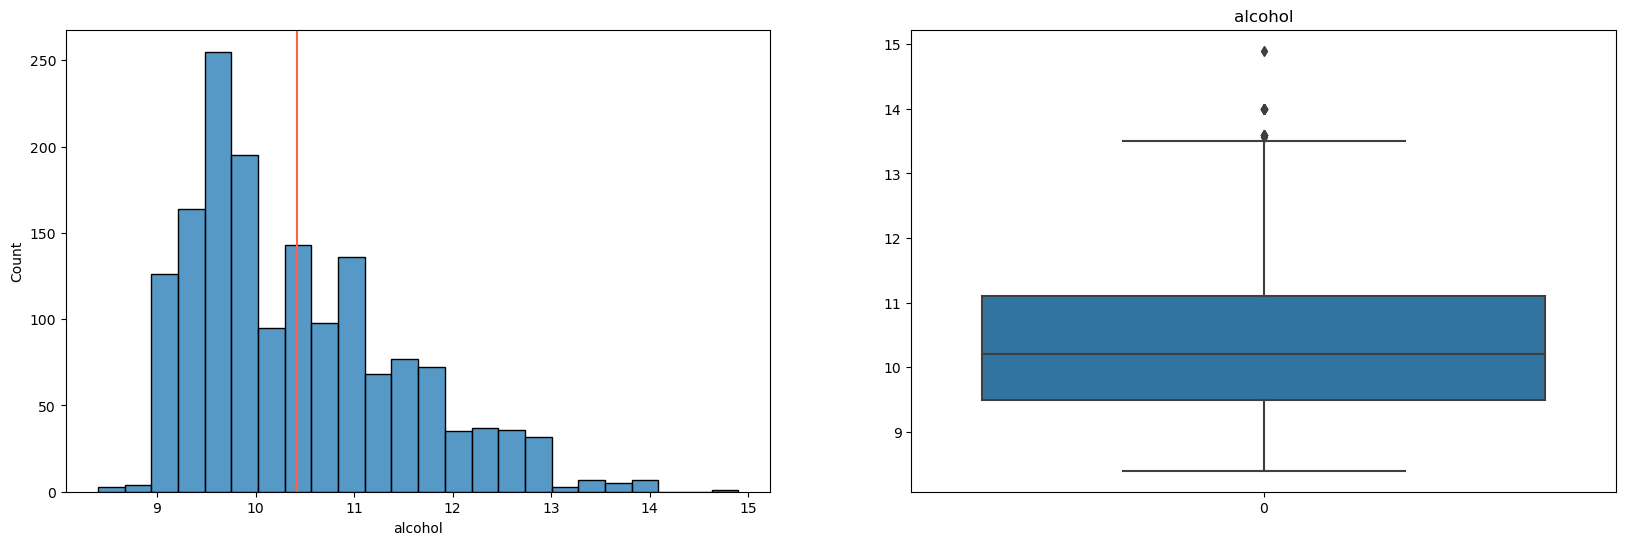

Analizando todas las variables categoricas 



,cantidad_na,porcentaje_na
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


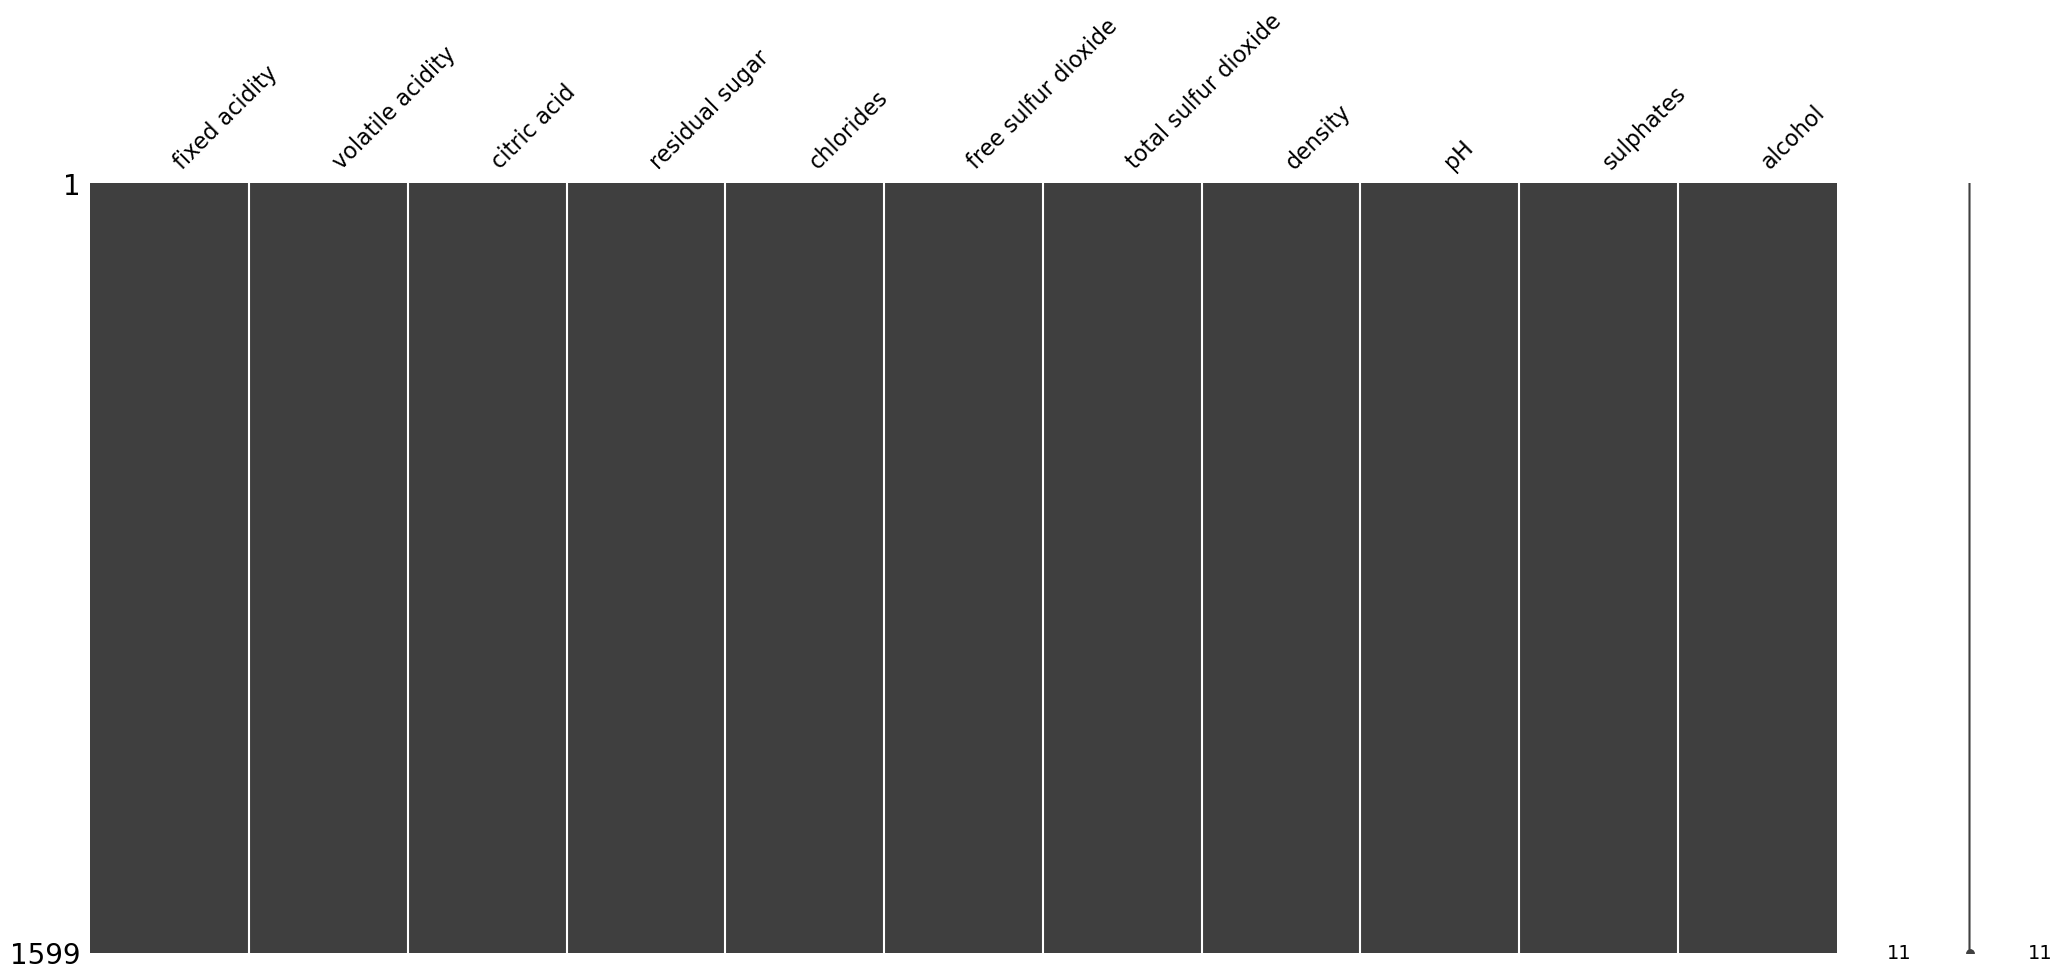

In [7]:
analizar_variables_indpendientes(vars_independientes)

- Al analizar todas las variables independientes, se puede observar que todas presentan outliers
univariados. La variable citric acid es la que presenta la menor cantidad de outliers univariados

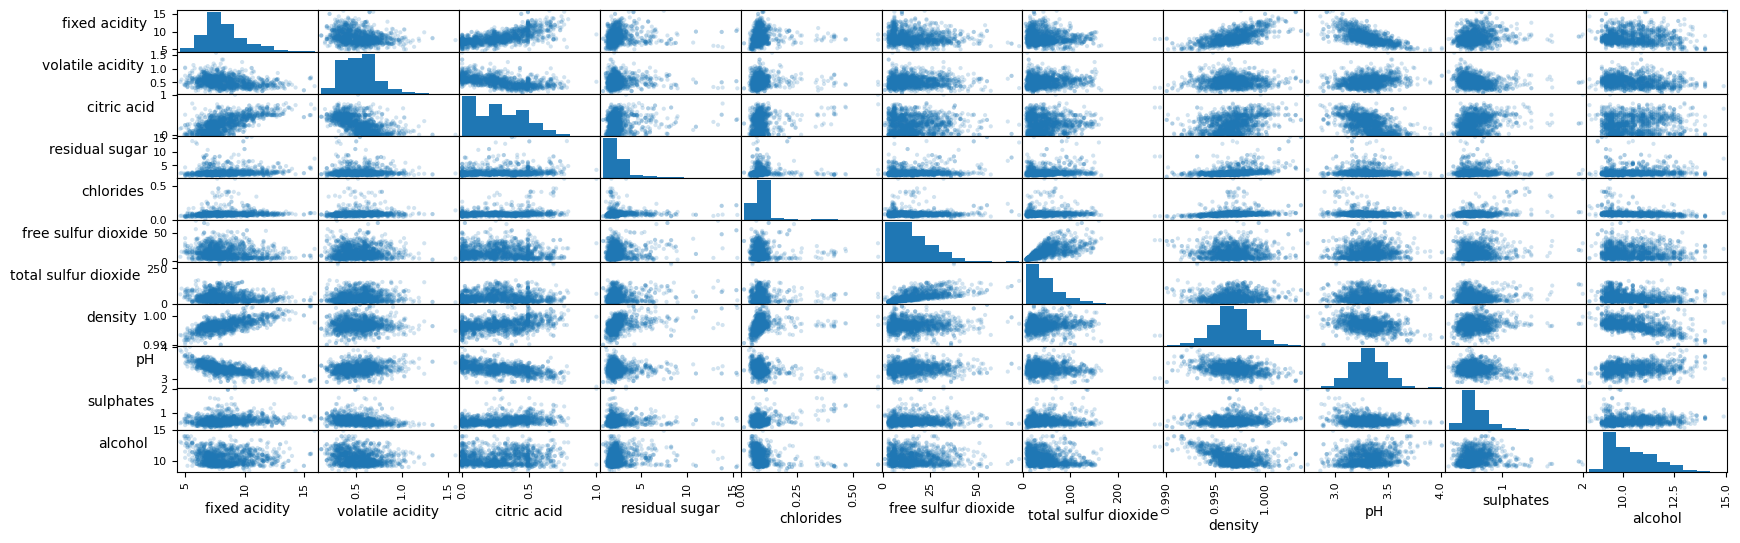

In [8]:
axes = pd.plotting.scatter_matrix(vars_independientes, alpha=0.2)

for ax in axes.flatten():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()

- Al analizar los outliers multivariados se pudieron observar los siguientes resultados:

    1. Fixed acidity: Con la mayoria de las variables presenta outliers a un valor de 15
    2. Volatile acidity: Con la mayoria de las variables presenta outliers pasado un valor de 1
    3. Citric acid: Con la mayoria de las variables presenta outliers a un valor de 1
    4. Residual sugar: Con la mayoria de variable presenta outliers en valores mayores a 7.5-10
    5. Chlorides: Con todas las variables presenta outliers en valores mayores a 0.25
    6. Free sulfur dioxide: Con todas las variables presenta outliers presenta outliers desde el
    valor 50
    7. Total sulfur dioxide: Con todas las variables tiene outliers en los valores 300
    8. Density: Con la mayoria de las varibales presenta una pequeña cantidad de outliers en sus
    valores extremos (0.990 y 1.005)
    9. pH: Con la mayoria de variables presenta outliers en valores mayores a ~3.8
    10. Sulphates: Con la mayoria de variables presenta outliers en valores mayores a ~1.2
    11. Alcohol: Con la mayoria de variables presenta outliers en valores de 7.5 y desde ~13.5

# Ejercicio 3

In [9]:
X = df.drop(columns='quality')
y = df['quality']

In [10]:
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

scaler = StandardScaler().fit(X_train_pre)
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

In [37]:
DICCIONARIO_MODELOS_REGULARIZACION = {'ridge': RidgeCV(cv=10),
                                      'lasso': LassoCV(cv=10),
                                      'elastic': ElasticNetCV(cv=10)}

def entrenar_modelo_y_extraer_coefs_alpha(modelo_a_entrenar, X_train, y_train):
    modelo_a_entrenar.fit(X_train, y_train)
    coeficientes = modelo_a_entrenar.coef_
    alpha = modelo_a_entrenar.alpha_

    return coeficientes, alpha

def calcular_metricas_modelo(modelo_entrenado, X_test, y_test):
    y_predict = modelo_entrenado.predict(X_test)
    mae = median_absolute_error(y_test, y_predict)
    rmse = mean_squared_error(y_test, y_predict, squared=False)

    return mae, rmse

def imprimir_desempeno_modelo_regularizacion(coeficientes, alpha, mae, rmse):
    print(f'Los coeficientes de las variables fueron: \n{coeficientes}\n'
          f'El alpha elegido del modelo fue: {alpha}\n\n'
          f'El Mean Absolute Error fue: {mae}\n'
          f'El Root Mean Squared Error fue: {rmse}\n\n')
    
def construir_modelo_regularizacion(tipo_modelo, X_train, X_test, y_train, y_test):
    modelo = DICCIONARIO_MODELOS_REGULARIZACION[tipo_modelo]
    coefs, alpha = entrenar_modelo_y_extraer_coefs_alpha(modelo, X_train, y_train)
    mae, rmse = calcular_metricas_modelo(modelo, X_test, y_test)
    imprimir_desempeno_modelo_regularizacion(coefs, alpha, mae, rmse)

    return modelo, coefs

In [88]:
ridge, coefs_ridge = construir_modelo_regularizacion('ridge', X_train, X_test, y_train, y_test)
lasso, coefs_lasso = construir_modelo_regularizacion('lasso', X_train, X_test, y_train, y_test)
elastic, coefs_elastic = construir_modelo_regularizacion('elastic', X_train, X_test, y_train, y_test)

Los coeficientes de las variables fueron: 
[ 0.10209064 -0.21116838 -0.0532544   0.02575473 -0.08123488  0.06010683
 -0.11903132 -0.07970657 -0.0482498   0.14830267  0.26368708]
El alpha elegido del modelo fue: 10.0

El Mean Absolute Error fue: 0.39971310322651155
El Root Mean Squared Error fue: 0.6509338469887037


Los coeficientes de las variables fueron: 
[ 0.10183391 -0.21350241 -0.05634634  0.02478747 -0.08071883  0.06044974
 -0.11902707 -0.0769415  -0.04926583  0.14853624  0.26725115]
El alpha elegido del modelo fue: 0.00046859475330573855

El Mean Absolute Error fue: 0.39979998993485877
El Root Mean Squared Error fue: 0.6510058894392621


Los coeficientes de las variables fueron: 
[ 0.09585993 -0.21227345 -0.05232749  0.02243652 -0.08044397  0.05902855
 -0.11772138 -0.07235275 -0.0496835   0.14696651  0.2686736 ]
El alpha elegido del modelo fue: 0.002165029313829457

El Mean Absolute Error fue: 0.39917873274310134
El Root Mean Squared Error fue: 0.6506435923199115




- Segun las metricas, el mejor modelo seria el de ElasticNetCV. Esto, ya que presenta el menor
Mean Absolute Error (0.39917) y Root Mean Squared Error (0.650).

In [89]:
coefs_ridge = pd.DataFrame(zip(X_train.columns, coefs_ridge), columns=['variable', 'valor'])
coefs_lasso = pd.DataFrame(zip(X_train.columns, coefs_lasso), columns=['variable', 'valor'])
coefs_elastic = pd.DataFrame(zip(X_train.columns, coefs_elastic), columns=['variable', 'valor'])

coefs_ridge['Identificador'] = 'Ridge'
coefs_lasso['Identificador'] = 'Lasso'
coefs_elastic['Identificador'] = 'Elastic'

unidas = pd.concat([coefs_ridge, coefs_lasso, coefs_elastic])

<AxesSubplot:xlabel='variable', ylabel='valor'>

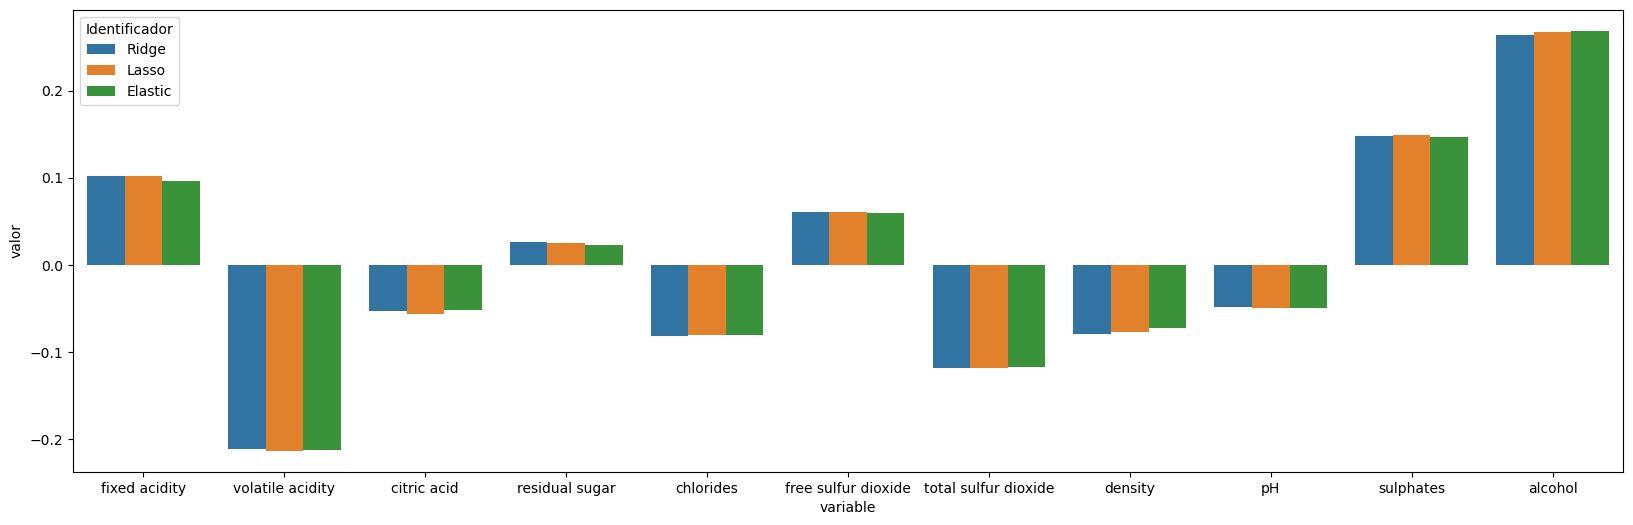

In [90]:
sns.barplot(data=unidas, x='variable', y='valor', hue='Identificador')

En general, todas las variables mantienen un comportamiento similar a lo largo de todos los modelos.
Aun asi, los modelos que tienen la menor variacion entre modelos son:

- Volatile acidity
- Chlorides
- Free Sulfur Dioxide
- Total sulfur Dioxide
- pH
- Sulphates